## Foundations Of AI Project

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Loading Libraries and Data

In [3]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('neo_v2.csv')                  # Loading the data

In [5]:
df.head()                                       # Printing the first 5 rows

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [6]:
df.shape            # shape of the dataset

(90836, 10)

In [7]:
df.info()              # Printing size, type and name of the columns                             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [8]:
df.describe()           # Printing statistical description of the data

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


### Feature Engineering

In [9]:
df.isnull().sum()                              # Checking for Null entries

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [10]:
df.duplicated().sum()                         # Checking for duplicates

0

In [11]:
df.sentry_object.unique()                    # Sentry object only has one unique value, it can be dropped

array([False])

In [12]:
df.orbiting_body.unique()                    # Orbiting body also has only one unique value, it can be dropped

array(['Earth'], dtype=object)

In [13]:
# Combining max and min diameter by taking average to get the full size of the object
df['full_size'] = (df['est_diameter_max'] + df['est_diameter_min'])/2

In [14]:
# Get the list of columns
cols = list(df.columns)

# Find the index of 'est_diameter_max' column
idx = cols.index('est_diameter_max')

# Rearrange the columns to insert 'full_size' after 'est_diameter_max'
new_cols = cols[:idx+1] + ['full_size'] + cols[idx+1:-1]  # Adjust the list to reposition 'full_size'

# Reassign the dataframe with the new column order
df = df[new_cols]

In [15]:
df.head()

,id,name,est_diameter_min,est_diameter_max,full_size,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,1.938843,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,0.430073,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,1.168268,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,0.156150,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,0.412613,42737.733765,4.627557e+07,Earth,False,20.09,True


In [16]:
# dropping these columns as they don't directly affect the target column i.e. hazardous.
cols_drop = ['id', 'name', 'est_diameter_min', 'est_diameter_max', 'orbiting_body', 'sentry_object']
df_1 = df.drop(columns=cols_drop, inplace=False)

* **id, name are just identifying features for an object which do not signify whether an object is hazardous or not.**

* **est_diameter_min and est_diameter_max have already been combined into the full_size column, hence can be dropped.**

* **orbiting_body and sentry_object have only one unique value which adds no significance to the target column, therefore can be dropped.**

In [17]:
df_1.head()                             # data after feature engineering

,full_size,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.938843,13569.249224,5.483974e+07,16.73,False
1,0.430073,73588.726663,6.143813e+07,20.00,True
2,1.168268,114258.692129,4.979872e+07,17.83,False
3,0.156150,24764.303138,2.543497e+07,22.20,False
4,0.412613,42737.733765,4.627557e+07,20.09,True


### Data Visualization and Data Analysis

In [18]:
# Grouping objects by name and sorting by absolute_magnitude
g_d = df.groupby('name')[['absolute_magnitude' , 'hazardous']].min().reset_index().sort_values(by ='absolute_magnitude')
g_d.head(60)

,name,absolute_magnitude,hazardous
24704,1036 Ganymed (A924 UB),9.23,False
26126,433 Eros (A898 PA),10.31,False
25119,1866 Sisyphus (1972 XA),12.44,False
26658,4954 Eric (1990 SQ),12.58,False
24997,1627 Ivar (1929 SH),12.76,False
25239,2212 Hephaistos (1978 SB),13.53,False
25351,25916 (2001 CP44),13.76,False
25161,1980 Tezcatlipoca (1950 LA),13.80,False
27109,5587 (1990 SB),13.82,False
25198,20826 (2000 UV13),13.84,False


In [19]:
g_d.name.unique()

array(['1036 Ganymed (A924 UB)', '433 Eros (A898 PA)',
       '1866 Sisyphus (1972 XA)', ..., '(2020 CW)', '(2021 BO)',
       '(2008 TS26)'], dtype=object)

<Axes: xlabel='hazardous', ylabel='count'>

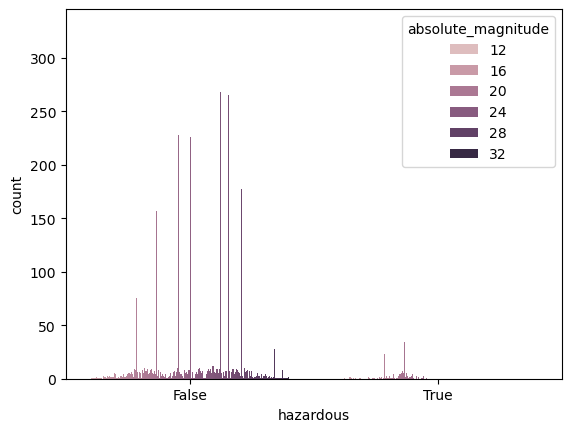

In [20]:
sns.countplot(g_d,x=g_d['hazardous'],hue=g_d['absolute_magnitude'])

**Inference from the graph shown above:**

* The magnitude values for hazardous values as false is highere than the ones with hazardous value as true.
* When grouped by name, the values for false seem to be higher than the ones in True.  

<Axes: xlabel='hazardous', ylabel='count'>

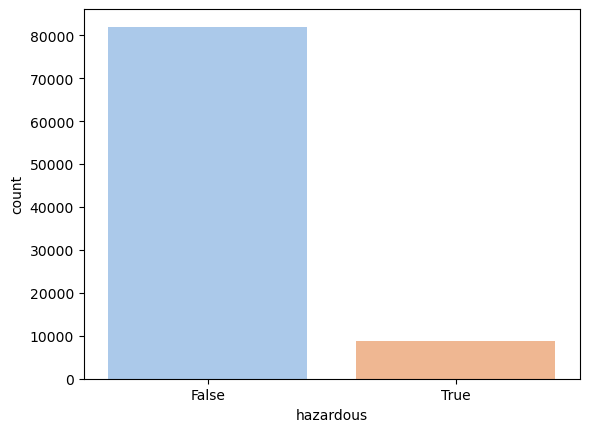

In [21]:
# Counting number of samples for hazardous values as True and False
sns.countplot(x=df['hazardous'], palette='pastel')

**Inferences from the graph shown above:**

* Firstly, the values for `False` significantly superseeds the number of values for `True`. This creates a substancial class imbalance which can adversely affect the model's accuracy.

* Therefore, the class imabalance needs to be addresed. Some of the methods that can be used are:
    * **Synthetic Minority Oversampling Technique:** SMOTE is a popular technique for addressing class imbalance. It works by creating synthetic examples for the minority class rather than duplicating data. This helps balance the dataset without reducing the number of samples or introducing redundancy. As the data is small this technique preserves original data which makes it effective for smaller datasets.

    * **Class Weighting:** Many machine learning algorithms (e.g., Logistic Regression, Random Forest, and XGBoost) allow you to assign weights to classes inversely proportional to their frequency. This ensures the model gives more importance to the minority class.

    * **Cost-Sensitive Learning:** Modify the loss function of your model to penalize misclassifications of the minority class more heavily. This is particularly useful for algorithms like XGBoost.

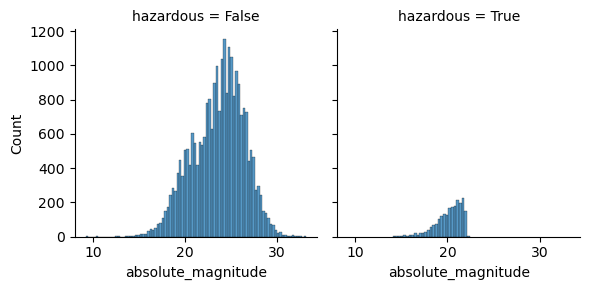

In [22]:
# Counting values on the basis of absolute magnitude and differentiated by hazardous value
g = sns.FacetGrid(g_d, col="hazardous")
g.map(sns.histplot, "absolute_magnitude")

**Inference from the graph shown above:**

* Firstly, the class imbalance is evident in this graph as well, with the values for `false` superseeding the values for `true`.

* Although, it is clear that the absolute_magnitude for left side of the graph seems to be higher for the one on the right.

In [23]:
df_1.head()

,full_size,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.938843,13569.249224,5.483974e+07,16.73,False
1,0.430073,73588.726663,6.143813e+07,20.00,True
2,1.168268,114258.692129,4.979872e+07,17.83,False
3,0.156150,24764.303138,2.543497e+07,22.20,False
4,0.412613,42737.733765,4.627557e+07,20.09,True


In [24]:
num = ['full_size', 'relative_velocity', 'miss_distance', 'absolute_magnitude'] # list of numerical columns

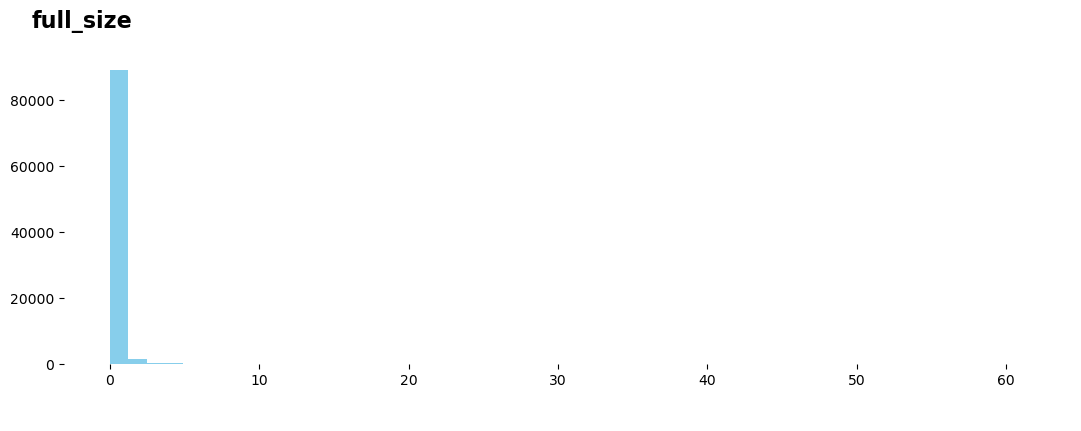

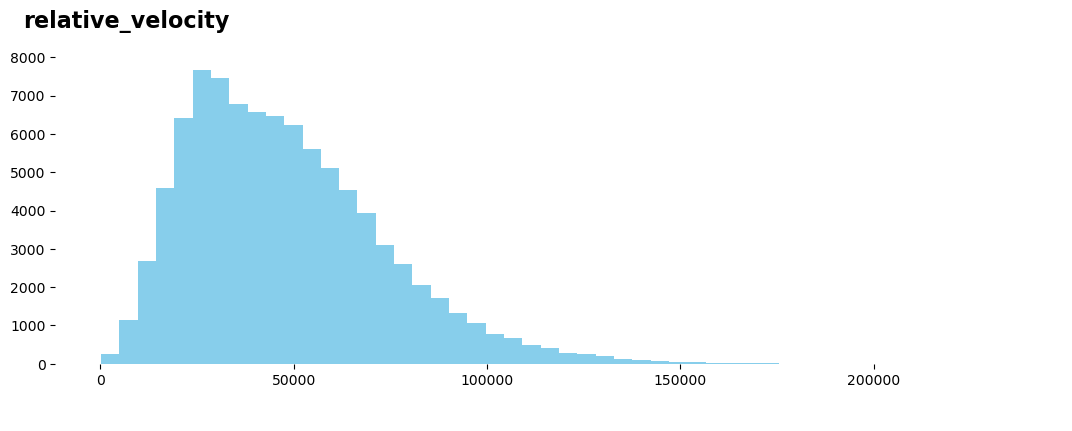

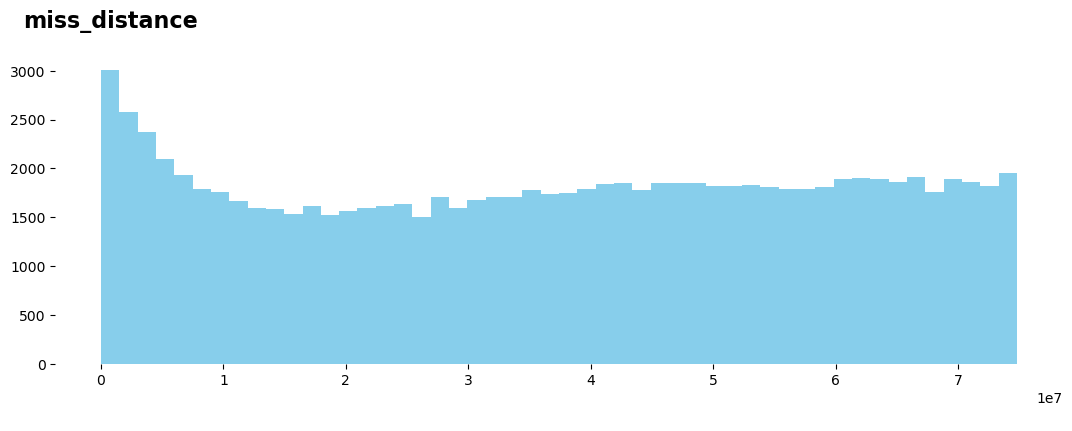

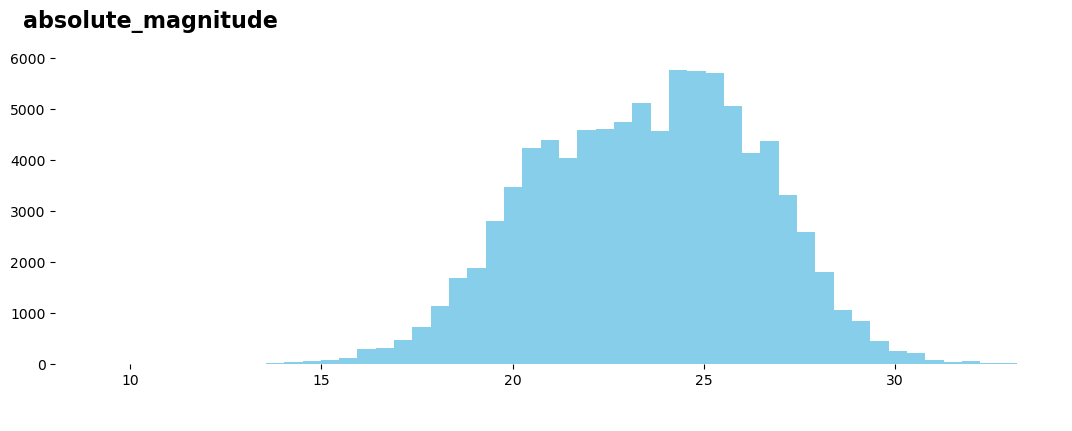

In [25]:
# Plotting histograms for all numerical columns in the dataset
for n in num:
    fig,ax = plt.subplots(1,1,figsize=(13,4))
    plt.hist(df_1[n],color='skyblue',bins=50)
    fig.text(0.1,0.95,f"{n}",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.xlabel(" ",fontsize=20)
    plt.ylabel=("")
    plt.box(False)

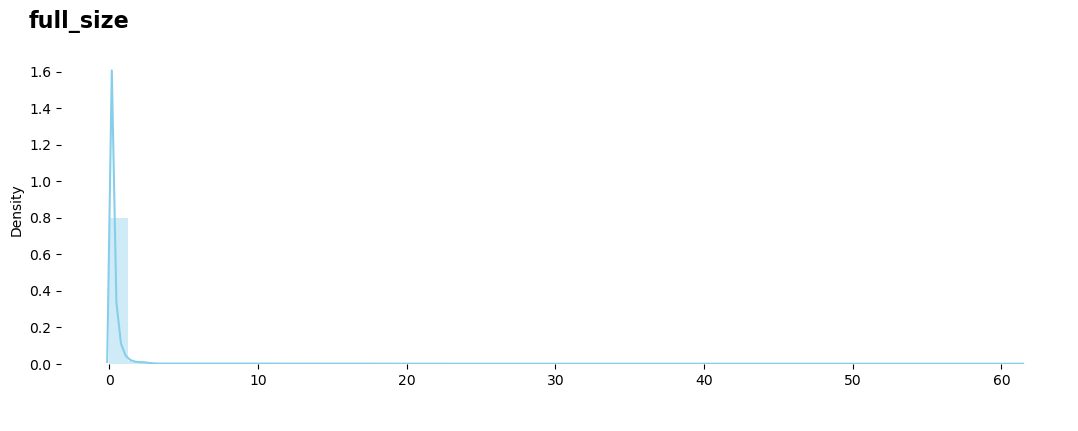

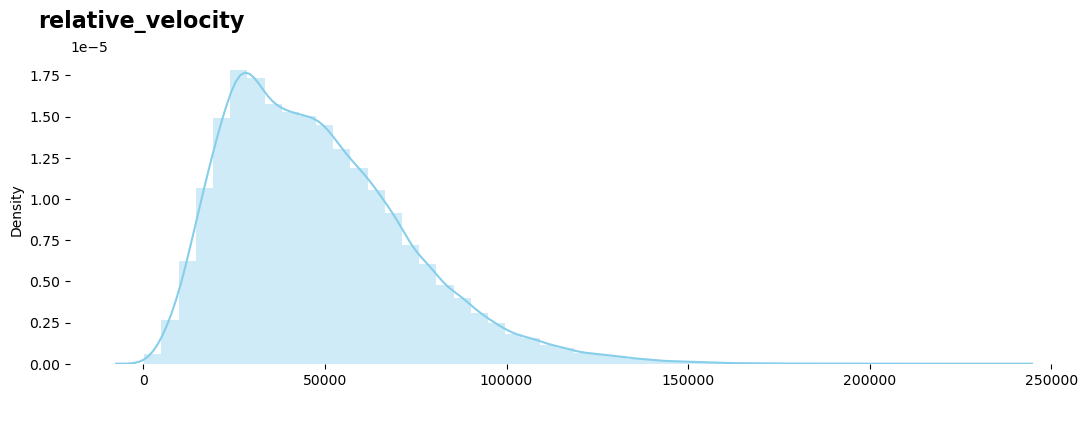

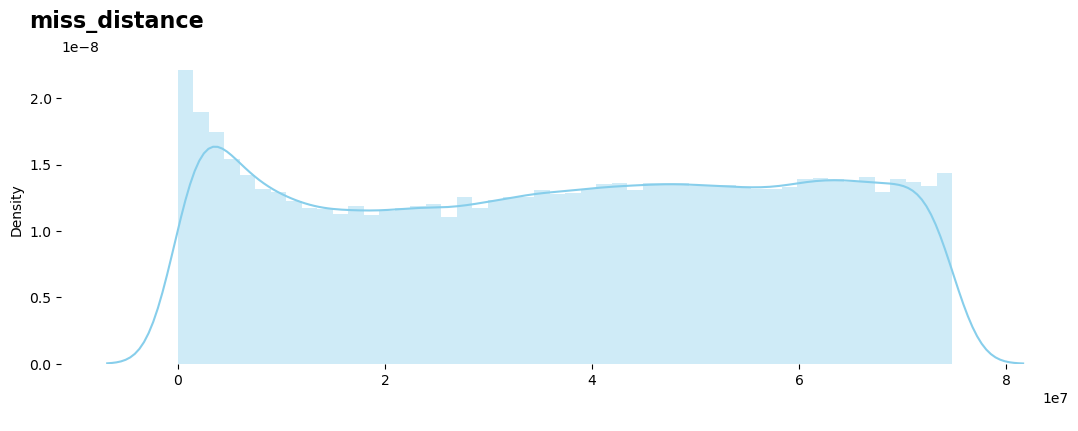

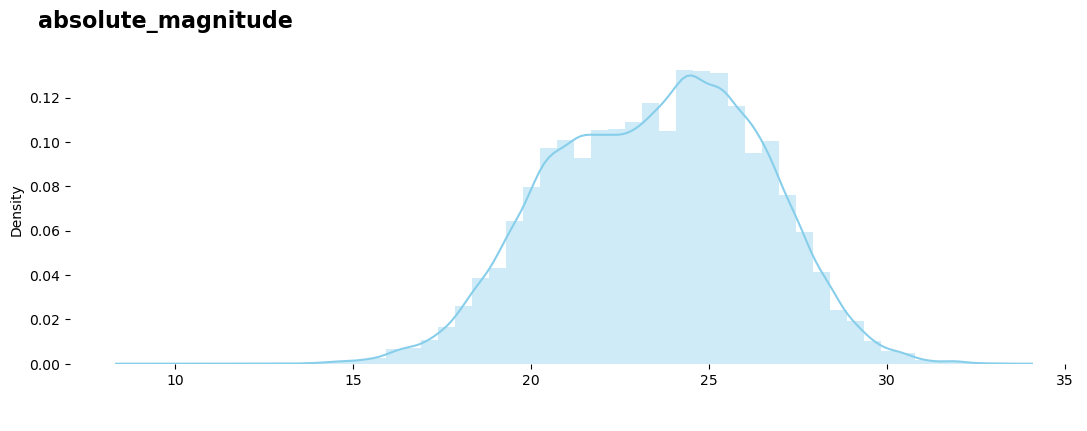

In [26]:
# Plotting distplots for numerical columns in the dataset
for n in num:
    fig,ax = plt.subplots(1,1,figsize=(13,4))
    # If this shows error then replace Distplot with histplot, distplot will be depriciated soon from Seaborn
    sns.distplot(df_1[n],color='skyblue',bins=50)
    fig.text(0.1,0.95,f"{n}",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.xlabel(" ",fontsize=20)
    plt.ylabel=("")
    plt.box(False)

**Inferences from the numerical plots shown above (histogram and distplot):**

* The distplot shows densities of the values in these columns:
    * The density for `full_size` column values peak around `0`.
    * The density `relative_velocity` gradually increases from 0 and then peaks around 4000 before slowly decreasing
    * The density for `miss_distance` columns peaks in between `0 to 1` and then has a stagnant density throughout.
    * The density for `absolute_magnitude` peaks around `25` and gradually decreased after that point.

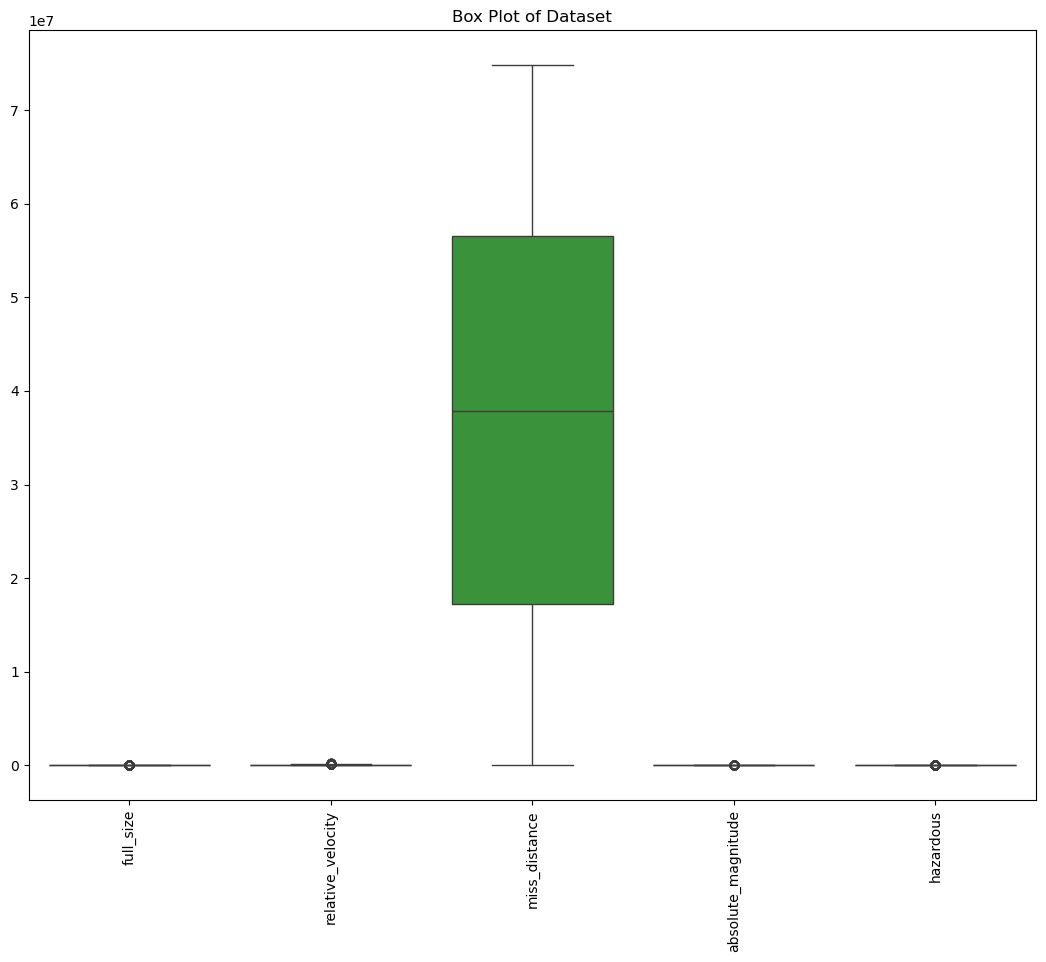

In [27]:
# Box plot for the numerical values
plt.figure(figsize=(13,10))
sns.boxplot(data=df_1)
plt.xticks(rotation=90)
plt.title('Box Plot of Dataset')
plt.show()

**Inference from the box plot:**

* The dataset is evenly distributed, has no outliers.
* The values for distance lie in greater range than other features.

### Data Analysis

In [28]:
X = df_1.drop("hazardous", axis=1)      # assigning feature columns to variable X

In [29]:
X.head()

,full_size,relative_velocity,miss_distance,absolute_magnitude
0,1.938843,13569.249224,5.483974e+07,16.73
1,0.430073,73588.726663,6.143813e+07,20.00
2,1.168268,114258.692129,4.979872e+07,17.83
3,0.156150,24764.303138,2.543497e+07,22.20
4,0.412613,42737.733765,4.627557e+07,20.09


In [30]:
# Converting boolen to integrer format for model training and evalutaion
df_1['hazardous']=df_1['hazardous'].astype(int)

In [31]:
df_1['hazardous']

0        0
1        1
2        0
3        0
4        1
        ..
90831    0
90832    0
90833    0
90834    0
90835    0
Name: hazardous, Length: 90836, dtype: int32

In [32]:
y = df_1['hazardous']   # assigning target variable y

In [33]:
y

0        0
1        1
2        0
3        0
4        1
        ..
90831    0
90832    0
90833    0
90834    0
90835    0
Name: hazardous, Length: 90836, dtype: int32

In [34]:
# Performing train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* **Synthetic Minority Oversampling Technique:** SMOTE is a popular technique for addressing class imbalance. It works by creating synthetic examples for the minority class rather than duplicating data. This helps balance the dataset without reducing the number of samples or introducing redundancy. As the data is small this technique preserves original data which makes it effective for smaller datasets.

In [35]:
# Removing class imabalance with SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [36]:
# Checking the shape and count after oversampling
print(f'After OverSampling, the shape of train_X: {x_train_res.shape}')
print(f'After OverSampling, the shape of train_y: {y_train_res.shape}')

print(f"After OverSampling, counts of label '1': {sum(y_train_res == 1)}")
print(f"After OverSampling, counts of label '0': {sum(y_train_res == 0)}")

After OverSampling, the shape of train_X: (131114, 4)
After OverSampling, the shape of train_y: (131114,)
After OverSampling, counts of label '1': 65557
After OverSampling, counts of label '0': 65557


In [37]:
y_target = pd.DataFrame(data=y_train_res, columns=['target'])   # converting to dataframe for visualization

<Axes: xlabel='target', ylabel='count'>

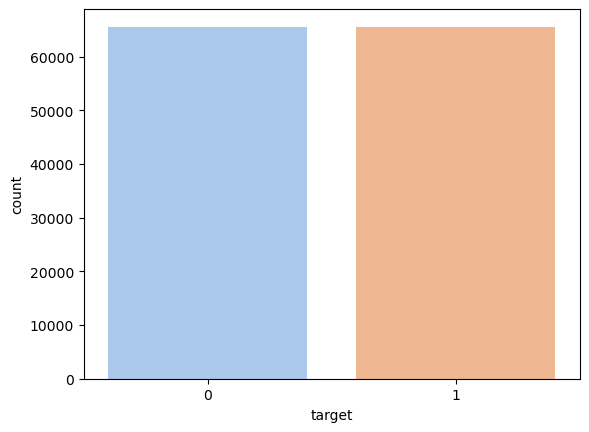

In [38]:
sns.countplot(x = y_target['target'],palette='pastel')      # Countplot after removing class imbalance

In [39]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1])

In [40]:
y_test

20406    0
74443    0
74306    0
45943    0
62859    0
        ..
51634    0
85083    0
38905    0
16144    1
54508    0
Name: hazardous, Length: 18168, dtype: int32

In [41]:
# print minority class percentage after balancing classes
minority_class_percent = 100 - round(sum(y_train_res) / len(y_train_res) * 100)
print(len(x_train_res))
print("Minority class percentage: {}%".format(str(minority_class_percent)))

131114
Minority class percentage: 50%


* **Standard Scaler :** StandardScaler is a preprocessing technique in scikit-learn used for standardizing features by removing the mean and scaling to unit variance.
StandardScaler, a popular preprocessing technique provided by scikit-learn, offers a simple yet effective method for standardizing feature values.

In [42]:
# Scaling the data before modelling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_res = sc.fit_transform(x_train_res)
x_test = sc.transform(x_test)

### Model Training and Evaluation

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [44]:
xgb_train = xgb.DMatrix(x_train_res, y_train_res, enable_categorical=True)
xgb_test = xgb.DMatrix(x_test, y_test, enable_categorical=True)

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Define models and hyperparameters
param_grids = {
    'random_forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1],
            'solver': ['liblinear'],
            'penalty': ['l1', 'l2']
        }
    },
    'xgboost': {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0]
        }
    }
}

# Perform GridSearchCV for each model
best_models = {}
for name, config in param_grids.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(estimator=config['model'],
                               param_grid=config['params'],
                               scoring='accuracy',
                               cv=5,
                               verbose=1,
                               n_jobs=-1)
    grid_search.fit(x_train_res, y_train_res)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Evaluate the models
for name, model in best_models.items():
    print(f"\n{name.upper()} Evaluation:")
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))

Running GridSearchCV for random_forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for random_forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Running GridSearchCV for logistic_regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for logistic_regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Running GridSearchCV for xgboost...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for xgboost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

RANDOM_FOREST Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     16439
           1       0.52      0.56      0.54      1729

    accuracy                           0.91     18168
   macro avg       0.74      0.75      0.75     18168
weighted avg       0.91      0.91      0.91     18168


LOGISTIC_REGRE

In [60]:
rf_clf = RandomForestClassifier(max_depth=None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)

In [47]:
rf_clf.fit(x_train_res,y_train_res)

RandomForestClassifier(n_estimators=50)

In [48]:
y_pred = rf_clf.predict(x_test)

In [51]:
rf_clf.score(x_test, y_test)

0.908300308234258

In [52]:
rf_clf.score(x_train_res, y_train_res)

0.9999161035434813

In [59]:
# Hyperparameter tuning
rf_clf_1 = RandomForestClassifier(max_depth=10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 40)

In [61]:
rf_clf_1.fit(x_train_res, y_train_res)

RandomForestClassifier(max_depth=10, n_estimators=40)

In [62]:
y_pred_1 = rf_clf_1.predict(x_test)

In [63]:
rf_clf_1.score(x_test, y_test)

0.8052069572875385

In [ ]:
rf_clf_1.score(x_train_res, y_train_res)

0.8954878960294095

**regularization, n_estimators, max_features, cross_validation, cross_transformation, change train:test split to 60-40**